<a href="https://colab.research.google.com/github/Zuhair0000/tensorflow_bootcamp/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in Tensorflow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.19.0


# Creating data to view and fit

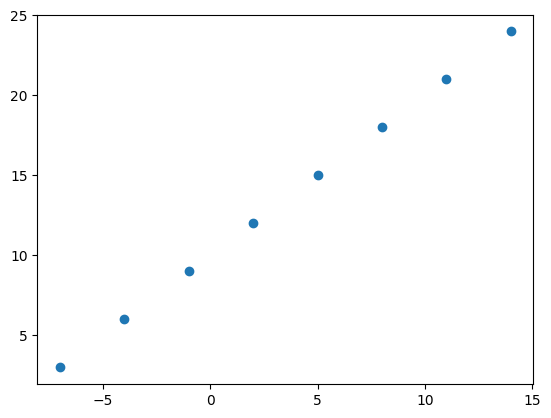

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array([3.0, 6.0, 9.0, 12.0 , 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
housse_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
housse_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

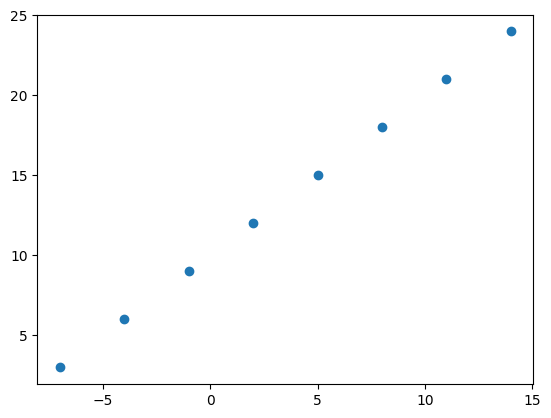

In [5]:
plt.scatter(X, y)

In [6]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.7185 - mae: 13.7185
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.5293 - mae: 11.5293
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 9.5606 - mae: 9.5606
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 6.6953 - mae: 6.6953
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 3.9723 - mae: 3.9723
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 5.7931 - mae: 5.7931
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 5.9815 - mae: 5.9815
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 4.8230 - mae: 4.8230
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3.7020 - mae: 3.7020
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 4.6506 - mae: 4.6506
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 4.8981 - mae: 4.8981
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 3.9323 - mae: 3.9323
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/

In [7]:
y_pred = model.predict(tf.constant([[17.0]], dtype=tf.float32))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[26.234186]], dtype=float32)

# Evaluate Model

In [8]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [9]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

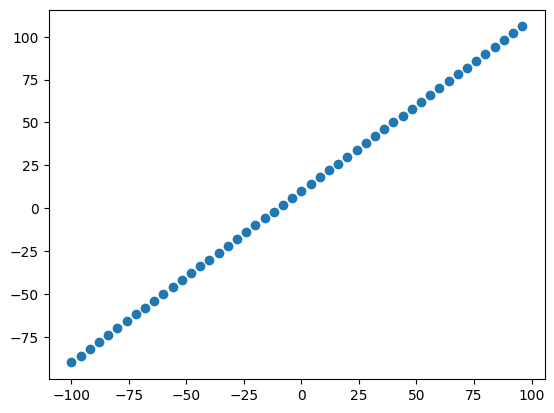

In [10]:
plt.scatter(X, y)

In [11]:
len(X)

50

In [12]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

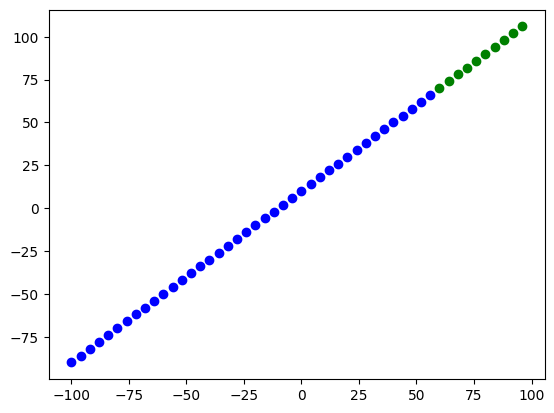

In [13]:
plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='g', label='Testing data')

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[1]),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mae', optimizer='Adam', metrics=['mae'])

model.fit(X_train, y_train, epochs=100, verbose=0)

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,505 (240.26 KB)

 Trainable params: 20,501 (80.08 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,004 (160.18 KB)

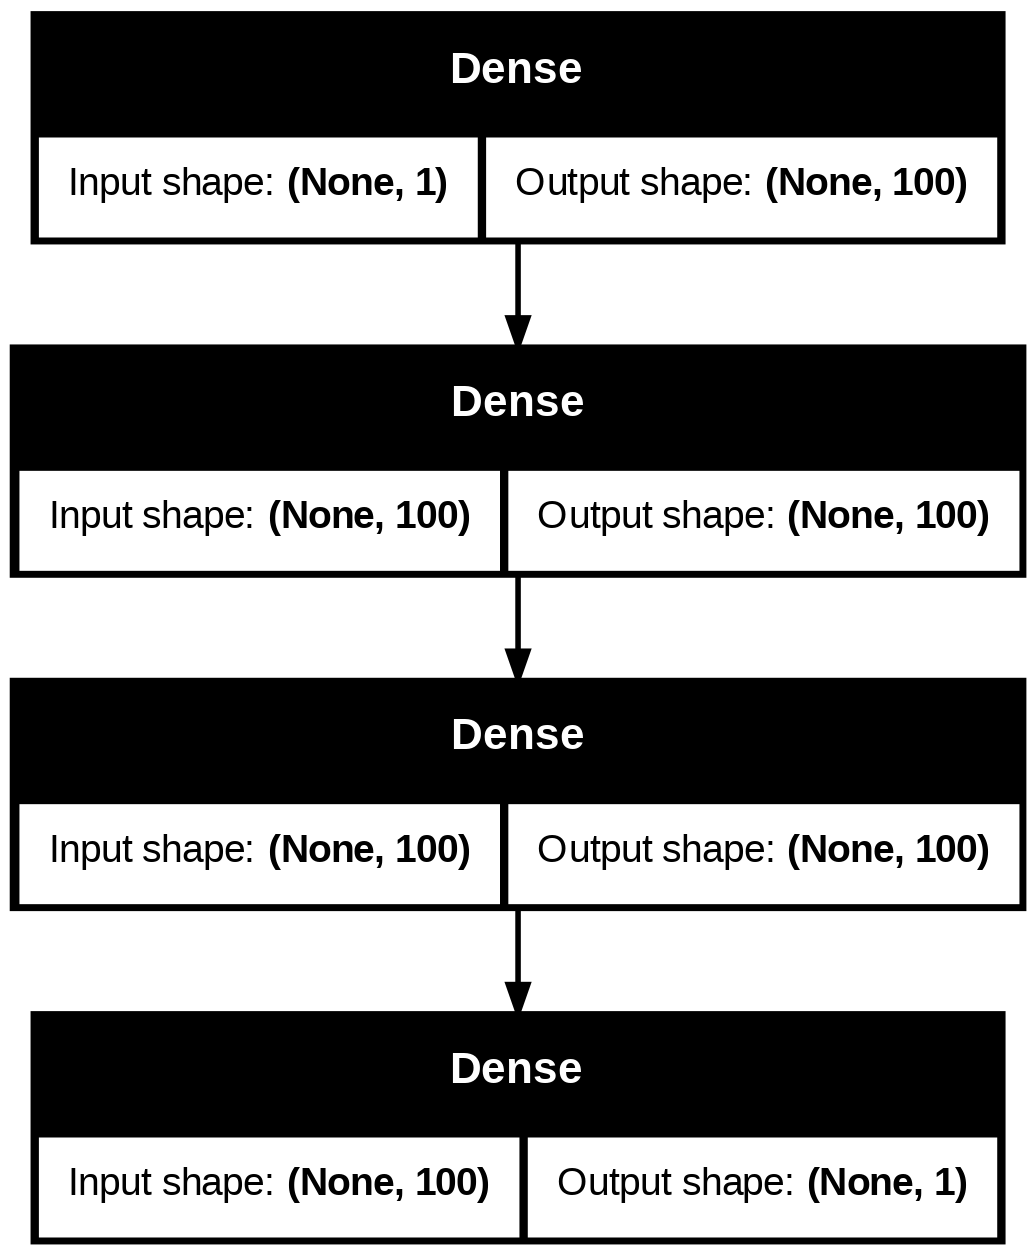

In [16]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

# Visualizing predictions

In [25]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


array([[ 72.682106],
       [ 77.204926],
       [ 81.75285 ],
       [ 86.30783 ],
       [ 90.862816],
       [ 95.41779 ],
       [ 99.97277 ],
       [104.53436 ],
       [109.11109 ],
       [113.68781 ]], dtype=float32)

In [18]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

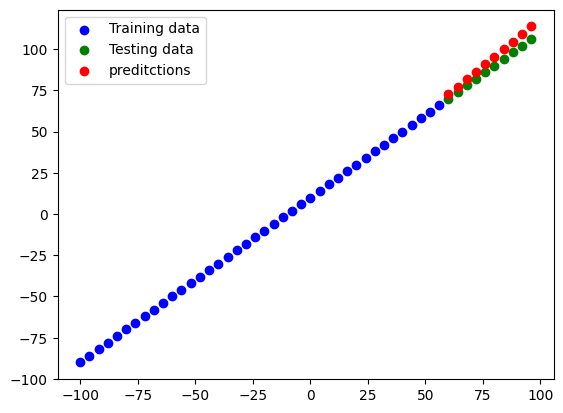

In [26]:
def plot_predictions(train_data = X_train,
                     train_labels= y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.scatter(train_data, train_labels, c='b', label="Training data")
  plt.scatter(test_data, test_labels, c='g', label="Testing data")
  plt.scatter(test_data, predictions, c='r', label="preditctions")
  plt.legend()
plot_predictions()

# Evaluating models

In [27]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 5.1534 - mae: 5.1534


[5.153436183929443, 5.153436183929443]

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

MAE: 5.153436183929443
MSE: 29.11480140686035


# Running experiments to improve our model

In [35]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model_1.compile(loss='mae', optimizer='SGD', metrics=['mae'])

model_1.fit(X_train, y_train, epochs=100, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


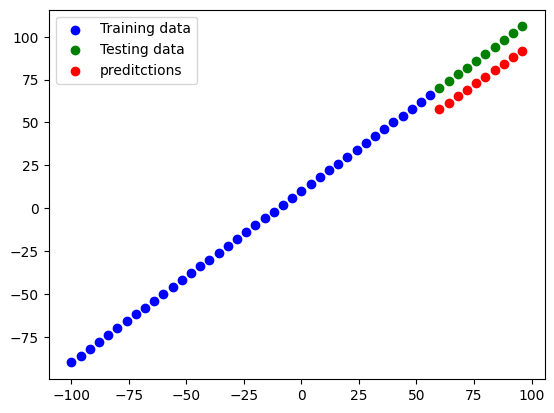

In [36]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("MAE:", mean_absolute_error(y_test, y_pred_1))
print("MSE:", mean_squared_error(y_test, y_pred_1))

MAE: 13.234527587890625
MSE: 175.62286376953125


In [43]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss='mae', optimizer='SGD', metrics=['mae'])

model_2.fit(X_train, y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


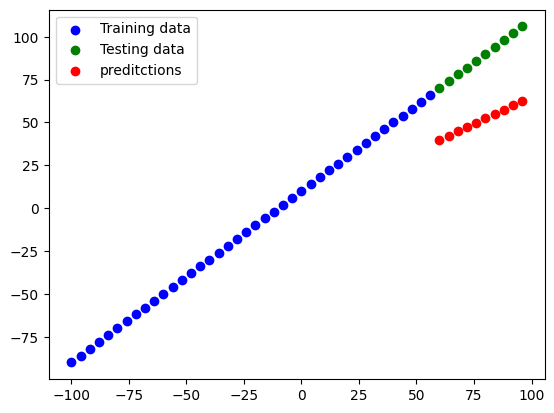

In [44]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [47]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss='mae', optimizer='SGD', metrics=['mae'])

model_3.fit(X_train, y_train, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


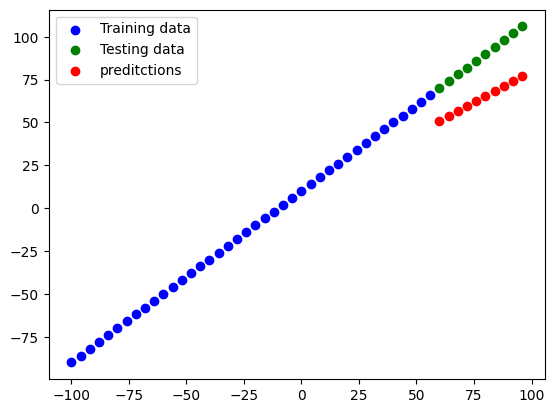

In [46]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [51]:
import pandas as pd
model_results = [["Model_1", mean_absolute_error(y_test, y_pred_1), mean_squared_error(y_test, y_pred_1)],
                 ["Model_2", mean_absolute_error(y_test, y_pred_2), mean_squared_error(y_test, y_pred_2)],
                 ["Model_3", mean_absolute_error(y_test, y_pred_3), mean_squared_error(y_test, y_pred_3)]]

all_results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])
all_results

,Model,MAE,MSE
0,Model_1,13.234528,175.622864
1,Model_2,36.878426,1377.636841
2,Model_3,24.083679,589.358765


# Tracking experiments

In [59]:
model_1.save('best_model.keras')

In [62]:
model_1.save("Best_Model.h5")

In [66]:
loaded = tf.keras.models.load_model("best_model.keras")

In [68]:
model_1_pred = model_1.predict(X_test)
loaded_pred = loaded.predict(X_test)
model_1_pred == loaded_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])